In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from random import randint
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Flatten
from keras.layers import Dense,Input
from keras.models import Sequential
from keras.models import Model
from keras.models import *
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [6]:
train1 = "dog_cat_new\\train1\\"
train2 = "dog_cat_new\\train2\\"
train3 = "dog_cat_new\\train3\\"
train = "dog_cat_new\\train\\"
test = "dog_cat_new\\test\\"

In [7]:
img_size = 256
def label_img(name):
    word_label = name.split('.')[0]
    if word_label == 'cat' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data():
    train_data =[]
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR,img)
        img = cv2.imread(DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data.append([np.array(img),label])
        
    
    return shuffle(train_data)
        

In [8]:
from sklearn.utils import shuffle
DIR =train1
train_data = load_training_data()

C:\Users\indian\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1 0]')

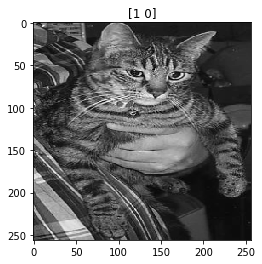

In [9]:
plt.imshow(train_data[3][0],cmap ='gist_gray')
plt.title(train_data[3][1])

In [10]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, 256,256, 1)
trainLabels = np.array([i[1] for i in train_data])

In [11]:
input = Input(shape =(256,256, 1))
x = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(96, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(96, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

layer = Flatten()(x)
layer = Dense(256, activation='relu')(layer)
layer = Dropout(0.2)(layer)
layer = Dense(128, activation='relu')(layer)
layer = Dense(2, activation = 'softmax')(layer)

model2 = Model(input,layer)

In [12]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [13]:
history = model2.fit(trainImages, trainLabels, batch_size = 32 , epochs = 5, verbose = 1)

Epoch 1/5
300/300 [==============================] - 64s 213ms/step - loss: 0.7010 - accuracy: 0.6967
Epoch 2/5
300/300 [==============================] - 43s 143ms/step - loss: 0.3046 - accuracy: 0.8567
Epoch 3/5
300/300 [==============================] - 37s 123ms/step - loss: 0.2551 - accuracy: 0.8967
Epoch 4/5
300/300 [==============================] - 44s 148ms/step - loss: 0.1714 - accuracy: 0.9367
Epoch 5/5
300/300 [==============================] - 54s 180ms/step - loss: 0.1312 - accuracy: 0.9500


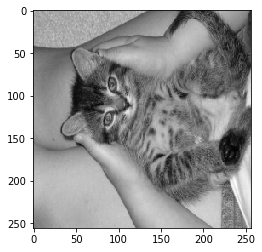

In [14]:
TEST_DIR = test
def load_test_data():
    test_data =[]
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data.append([np.array(img),label])
        
    
    return shuffle(test_data)
        

test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [15]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, 256,256, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model2.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

11.999999731779099


In [16]:
img_size = 256
def label_img1(name):
    word_label = name.split('.')[0]
    if word_label == 'dog' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data1():
    train_data1 =[]
    for img in os.listdir(DIR1):
        label = label_img1(img)
        path = os.path.join(DIR1,img)
        img = cv2.imread(DIR1+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data1.append([np.array(img),label])
        
    
    return shuffle(train_data1)

In [17]:
from sklearn.utils import shuffle
DIR1 =train2
train_data1 = load_training_data1()

C:\Users\indian\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1 0]')

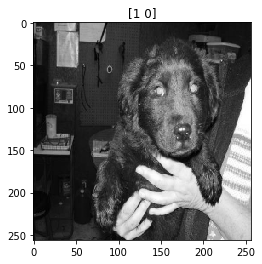

In [18]:
plt.imshow(train_data1[3][0],cmap ='gist_gray')
plt.title(train_data1[3][1])

In [19]:
trainImages1 = np.array([i[0] for i in train_data1]).reshape(-1, 256,256, 1)
trainLabels1 = np.array([i[1] for i in train_data1])

In [20]:
x1 = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(96, kernel_size=(3,3), activation='relu')(x1) 
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(96, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.2)(x1)
x1.trainable =True

layer1 = Flatten()(x1)
layer1 = Dense(256, activation='relu')(layer1)
layer1 = Dropout(0.2)(layer1)
layer1 = Dense(128, activation='relu')(layer1)
layer1 = Dense(2, activation = 'softmax')(layer1)

model3 = Model(input,layer1)

In [21]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [22]:
history1 = model3.fit(trainImages1, trainLabels1, batch_size = 32 , epochs = 5, verbose = 1)

Epoch 1/5
300/300 [==============================] - 60s 199ms/step - loss: 0.6154 - accuracy: 0.6767
Epoch 2/5
300/300 [==============================] - 54s 181ms/step - loss: 0.3824 - accuracy: 0.8367
Epoch 3/5
300/300 [==============================] - 53s 178ms/step - loss: 0.2886 - accuracy: 0.8767
Epoch 4/5
300/300 [==============================] - 53s 177ms/step - loss: 0.1827 - accuracy: 0.9333
Epoch 5/5
300/300 [==============================] - 55s 184ms/step - loss: 0.0958 - accuracy: 0.9633


In [23]:
testImages1 = np.array([i[0] for i in test_data]).reshape(-1, 256,256, 1)
testLabels1 = np.array([i[1] for i in test_data])

loss, acc = model3.evaluate(testImages1, testLabels1, verbose = 0)
print(acc * 100)

0.0


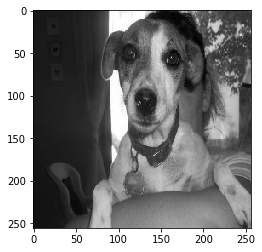

In [24]:
TEST_DIR = test
def load_test_data1():
    test_data1 =[]
    for img in os.listdir(TEST_DIR):
        label = label_img1(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data1.append([np.array(img),label])
        
    
    return shuffle(test_data1)
        

test_data1 = load_test_data1()    
plt.imshow(test_data1[10][0], cmap = 'gist_gray')

In [27]:
img_size = 256
def label_img2(name):
    word_label = name[:5]
    if word_label == 'horse' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data2():
    train_data3 =[]
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR,img)
        img = cv2.imread(DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data3.append([np.array(img),label])
        
    
    return shuffle(train_data3)
        

In [28]:
from sklearn.utils import shuffle
DIR =train2
train_data3 = load_training_data2()

C:\Users\indian\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0 1]')

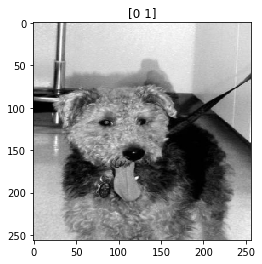

In [29]:
plt.imshow(train_data3[3][0],cmap ='gist_gray')
plt.title(train_data3[3][1])

In [30]:
trainImages3 = np.array([i[0] for i in train_data3]).reshape(-1, 256,256, 1)
trainLabels3 = np.array([i[1] for i in train_data3])

In [31]:
x2 = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, kernel_size=(3,3), activation='relu')(x2)
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(96, kernel_size=(3,3), activation='relu')(x2) 
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(96, kernel_size=(3,3), activation='relu')(x2)
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, kernel_size=(3,3), activation='relu')(x2)
x2 = MaxPool2D(pool_size=(2,2))(x2)
x2 = BatchNormalization()(x2)
x2 = Dropout(0.2)(x2)

layer2 = Flatten()(x2)
layer2 = Dense(256, activation='relu')(layer2)
layer2 = Dropout(0.2)(layer2)
layer2 = Dense(128, activation='relu')(layer2)
layer2 = Dense(2, activation = 'softmax')(layer2)

model4 = Model(input,layer2)

In [32]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [33]:
history2 = model4.fit(trainImages3, trainLabels3, batch_size = 32 , epochs = 5, verbose = 1)

Epoch 1/5
300/300 [==============================] - 80s 268ms/step - loss: 0.5516 - accuracy: 0.7967
Epoch 2/5
300/300 [==============================] - 49s 163ms/step - loss: 0.3201 - accuracy: 0.9100
Epoch 3/5
300/300 [==============================] - 43s 143ms/step - loss: 0.1412 - accuracy: 0.9433
Epoch 4/5
300/300 [==============================] - 44s 146ms/step - loss: 0.0899 - accuracy: 0.9633
Epoch 5/5
300/300 [==============================] - 45s 149ms/step - loss: 0.0530 - accuracy: 0.9867


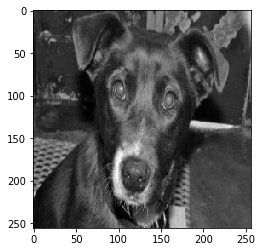

In [34]:
TEST_DIR = test
def load_test_data3():
    test_data3 =[]
    for img in os.listdir(TEST_DIR):
        label = label_img1(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data3.append([np.array(img),label])
        
    
    return shuffle(test_data3)
        

test_data3 = load_test_data3()    
plt.imshow(test_data3[10][0], cmap = 'gist_gray')

In [35]:
testImages3 = np.array([i[0] for i in test_data3]).reshape(-1, 256,256, 1)
testLabels3 = np.array([i[1] for i in test_data3])

loss, acc = model4.evaluate(testImages3, testLabels3, verbose = 0)
print(acc * 100)

100.0


In [36]:
filenames = sorted(os.listdir(train))
p4=0
d4=[]
for img_name in filenames:
    img = plt.imread(train + img_name)
    img  = np.resize(img, (256, 256))
    if p4==0:
      imgs4=(img)
      p4=1
    else:
      imgs4 = np.append(imgs4, img, axis=0)
    res = img_name[:3]
    d4.append(res)
print(d4)
    
print(imgs4.shape)
        
img_data = np.array(imgs4)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat'

(102400, 256)

In [42]:
imgs4 = np.reshape(imgs4, [400, 256, 256])
train_images, test_images = train_test_split(imgs4,test_size=0.33, random_state=42)
nRows,nCols = train_images.shape[1:]
nDims = nRows
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(train_images.shape)
print(test_images.shape)

(268, 256, 256)
(132, 256, 256)


In [43]:
imgs = np.reshape(imgs4, [ 400, 256, 256])
train_images, test_images, train_labels, test_labels = train_test_split(imgs4, d4, test_size=0.33, random_state=42)
print('Training data shape : ', train_images.shape, len(train_labels))
print('Testing data shape : ', test_images.shape, len(test_labels))
classes = np.unique(train_labels)
#classes=np.append(classes,0)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (268, 256, 256) 268
Testing data shape :  (132, 256, 256) 132
Total number of outputs :  2
Output classes :  ['cat' 'dog']


In [44]:
train_labels=[0 if x=='cat' else 1 if x =='dog' else 2 for x in train_labels]
print(train_labels)
len(train_labels)

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


268

In [45]:
test_labels=[0 if x=='cat' else 1 if x =='dog' else 2 for x in test_labels]
print(test_labels)
len(test_labels)

[1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


132

In [46]:
from keras.utils import to_categorical

nRows,nCols = train_images.shape[1:]
nDims = nRows
print(nCols)
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(len(train_labels))
print(len(test_labels))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print('Original label : ', train_labels[11])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[11])
print('Original label : ', test_labels[11])
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot[11])

256
268
132
Original label :  0
After conversion to categorical ( one-hot ) :  [1. 0.]
Original label :  1
After conversion to categorical ( one-hot ) :  [0. 1.]


In [51]:
from keras.layers import Activation

input_shape =(256,256,1)
a = Flatten()(x)
a = Activation('relu')(a)
b = Flatten()(x1)
b = Activation('relu')(b)
c = Flatten()(x2)
c = Activation('relu')(c)
mergedOut = concatenate([a,b,c], axis = 0)
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(0.2)(mergedOut)
mergedOut = Dense(128, activation='relu')(mergedOut)
mergedOut = Dense(2, activation = 'softmax')(mergedOut)

model5 = Model(input,mergedOut)

In [52]:
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [53]:
model5.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 254, 254, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 254, 254, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 254, 254, 32) 320         input_1[0][0]                    
____________________________________________________________________________________________

In [54]:
history4 = model5.fit(train_data,train_labels_one_hot,batch_size=1,epochs=20,validation_data=(test_data, test_labels_one_hot))

Train on 268 samples, validate on 132 samples
Epoch 1/20
268/268 [==============================] - 160s 598ms/step - loss: 0.9513 - accuracy: 0.5323 - val_loss: 0.9767 - val_accuracy: 0.4773
Epoch 2/20
268/268 [==============================] - 127s 473ms/step - loss: 0.7476 - accuracy: 0.4540 - val_loss: 0.6968 - val_accuracy: 0.4571
Epoch 3/20
268/268 [==============================] - 129s 483ms/step - loss: 0.7200 - accuracy: 0.4900 - val_loss: 0.7494 - val_accuracy: 0.4798
Epoch 4/20
268/268 [==============================] - 122s 456ms/step - loss: 0.7023 - accuracy: 0.5547 - val_loss: 0.7619 - val_accuracy: 0.5303
Epoch 5/20
268/268 [==============================] - 116s 433ms/step - loss: 0.6959 - accuracy: 0.5187 - val_loss: 0.7120 - val_accuracy: 0.5354
Epoch 6/20
268/268 [==============================] - 110s 411ms/step - loss: 0.6736 - accuracy: 0.5709 - val_loss: 0.7791 - val_accuracy: 0.4874
Epoch 7/20
268/268 [==============================] - 98s 366ms/step - loss: 0

In [55]:
imgcat=cv2.imread("dog_cat_new\\test\\1.jpg")
imgdog=cv2.imread("dog_cat_new\\test\\1.jpg")
imgcat=cv2.resize(imgcat,(256,256))
imgcat = cv2.cvtColor(cv2.resize(imgcat,(256,256)),cv2.COLOR_BGR2GRAY)
imgcat=imgcat.reshape(1,256,256,1)
imgdog=cv2.resize(imgdog,(256,256))
imgdog = cv2.cvtColor(cv2.resize(imgdog,(256,256)),cv2.COLOR_BGR2GRAY)
imgdog=imgdog.reshape(1,256,256,1)
images=([imgcat])
prediction=model5.predict([imgcat],steps=1)

In [56]:
prediction

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [57]:
model4.evaluate(test_data, test_labels_one_hot,batch_size= 1)

132/132 [==============================] - 10s 78ms/step


[3.6278718022146133, 0.4848484992980957]

In [58]:
prediction1=model3.predict([imgdog],steps=1)

In [59]:
prediction2=model2.predict([imgcat],steps=1)

In [60]:
prediction1

array([[1., 0.]], dtype=float32)

In [61]:
imgcat=imgcat.reshape(256,256,1)
imgdog=imgdog.reshape(256,256,1)
import matplotlib.pyplot as plt
if(prediction[:,:]>0.5).any():
    value ='cat :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='dog :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

cv2.imshow('imgdog',imgdog)


In [225]:
from keras.layers.normalization import BatchNormalization

model5 = Sequential([Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(96, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(96, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization()])

In [226]:
model6 = Sequential([Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,1)),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(96, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(96, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization(),
                     Conv2D(64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(pool_size=(2,2)),
                     BatchNormalization()])

In [239]:
model_concat = concatenate([model5.output, model6.output], axis=-1)

In [240]:
model_concat= Flatten()(model_concat)
model_concat= Dense(128, activation='softmax')(model_concat)
model_concat= Dense(128, activation='softmax')(model_concat)
model_concat= Dropout(0.2)(model_concat)
model_concat = Dense(2, activation='softmax')(model_concat)
model8 = Model(inputs=[model5.input, model6.input], outputs=model_concat)

In [241]:
model8.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])